In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
while 'notebooks' in os.getcwd():
    os.chdir("..")

import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statistics import mean
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

from src.mapping import get_movies_id_map
from src.collaborative_filtering.preprocessing.make_dataset \
    import read_train_test_matrix, read_ratings_df, train_test_split

from src.collaborative_filtering.models.train_model import \
    SGDOptimizer

## Model training

We will train two matrices $ X $ and $ X $ as

$$ X = (x_{ij})_{n_{features} \times n_{movies}} $$ 
$$ \Theta = (\theta _{ij})_{n_{features} \times n_{users}} $$

<!-- $$ X= 
\begin{pmatrix} 

    X _{1,1} & X _{1,2} & \dots & X _{1, n_{features}} \\ 
    X _{2,1} & X _{2,2} & \dots & X _{2, n_{features}} \\ 
    \vdots & \vdots & \vdots & \vdots \\ 
    X _{n_{movies}, 1} & X _{n_{movies}, 2} & \dots & X _{n_{movies}, n_{features}}
    
\end{pmatrix}
$$

$$ \Theta = 
\begin{pmatrix} 

    \theta _{1,1} & \theta _{1,2} & \dots & \theta _{1, n_{features}} \\ 
    \theta _{2,1} & \theta _{2,2} & \dots & \theta _{2, n_{features}} \\ 
    \vdots & \vdots & \vdots & \vdots \\ 
    \theta _{n_{users}, 1} & \theta _{n_{users}, 2} & \dots & \theta _{n_{users}, n_{features}}
    
\end{pmatrix}
$$ -->

and 

$$ \hat{Y} = \Theta ^T X $$

Minimizing the cost function 

$$
    J(\Theta, X) = \sum (y - \theta ^{(i)T}  x^{(j)}) ^2 + \lambda (|| \theta^{(i)} ||^2 + || x^{(j)} || ^2 )
$$

Here we are using $l_2$ regularization

In [3]:
ratings_df = read_ratings_df()

ratings_matrix = ratings_df.pivot(
    index = 'userID',
    columns= 'movieID',
    values= 'rating',
).replace(np.nan, 0)

In [4]:
Y_train, Y_test = read_train_test_matrix()

In [5]:
Y_train, Y_val = train_test_split(Y_train)

2113it [08:08,  4.32it/s]


In [8]:
Y_train.to_pickle("data/collaborative-filtering/Y_train.pkl") ,\
Y_val.to_pickle("data/collaborative-filtering/Y_val.pkl")

(None, None)

In [9]:
n_users, n_movies = Y_train.shape

In [10]:
users, movies = np.nonzero(np.array(Y_train))

In [11]:
y_train = np.array(Y_train)

In [19]:
model = SGDOptimizer()

In [20]:
model.get_params()

{'epsilon': 1e-05,
 'learning_rate': 0.001,
 'num_features': 5,
 'predict_constraints': False,
 'regularization': 'l2',
 'regularization_factor': 0.1,
 'train_epochs': 100}

In [16]:
y_val = np.array(Y_val)

In [17]:
y_val.nonzero()

(array([   0,    0,    0, ..., 2112, 2112, 2112], dtype=int64),
 array([ 105,  151,  154, ..., 7572, 8966, 9900], dtype=int64))

In [21]:
model.fit(y_train, y_val)

420068it [00:05, 71880.59it/s]


train epoch 0; 
train error: 3.442900868349606 
validation error: 3.5618680722237537


420068it [00:05, 71442.00it/s]


train epoch 1; 
train error: 2.6602212698769563 
validation error: 2.779978357459937


420068it [00:05, 71258.65it/s]


train epoch 2; 
train error: 2.3133003466519853 
validation error: 2.4307655733354285


420068it [00:07, 55197.24it/s]


train epoch 3; 
train error: 2.0996132169761834 
validation error: 2.2140917899045647


420068it [00:06, 63977.73it/s]


train epoch 4; 
train error: 1.9468823234450172 
validation error: 2.0577950401018965


420068it [00:06, 63310.51it/s]


train epoch 5; 
train error: 1.828608063973001 
validation error: 1.9355685430270682


420068it [00:06, 65397.82it/s]


train epoch 6; 
train error: 1.7326925031544052 
validation error: 1.8355300439634066


420068it [00:06, 65117.33it/s]


train epoch 7; 
train error: 1.652684432818114 
validation error: 1.751404464632389


420068it [00:06, 65893.70it/s]


train epoch 8; 
train error: 1.5847030095644257 
validation error: 1.679437147726746


420068it [00:06, 65567.05it/s]


train epoch 9; 
train error: 1.5261915966732538 
validation error: 1.6171540001770033


420068it [00:06, 64976.83it/s]


train epoch 10; 
train error: 1.4753508093069008 
validation error: 1.5628035690835194


420068it [00:06, 64438.59it/s]


train epoch 11; 
train error: 1.430852318249415 
validation error: 1.5150792466445915


420068it [00:07, 58656.66it/s]


train epoch 12; 
train error: 1.3916797895180246 
validation error: 1.4729675450813762


420068it [00:08, 50177.27it/s]


train epoch 13; 
train error: 1.3570328558270626 
validation error: 1.435658311720934


420068it [00:11, 38102.29it/s]


train epoch 14; 
train error: 1.3262656851970631 
validation error: 1.4024883699873578


420068it [00:07, 55114.73it/s]


train epoch 15; 
train error: 1.2988463754831756 
validation error: 1.3729047617355032


420068it [00:10, 38323.64it/s]


train epoch 16; 
train error: 1.2743296055272035 
validation error: 1.3464400793461841


420068it [00:07, 55903.18it/s]


train epoch 17; 
train error: 1.2523378874414774 
validation error: 1.3226953994681578


420068it [00:07, 59670.10it/s]


train epoch 18; 
train error: 1.232548398165593 
validation error: 1.301328024558397


420068it [00:09, 42629.82it/s]


train epoch 19; 
train error: 1.2146834204347754 
validation error: 1.2820422968981753


420068it [00:08, 49578.15it/s]


train epoch 20; 
train error: 1.1985031317766703 
validation error: 1.2645824269283072


420068it [00:08, 48417.91it/s]


train epoch 21; 
train error: 1.183799950423854 
validation error: 1.2487266994231607


420068it [00:08, 49450.38it/s]


train epoch 22; 
train error: 1.1703939489624942 
validation error: 1.2342826731483352


420068it [00:08, 49794.27it/s]


train epoch 23; 
train error: 1.1581290341625816 
validation error: 1.2210831353944698


420068it [00:08, 49164.60it/s]


train epoch 24; 
train error: 1.1468697050568777 
validation error: 1.2089826557074774


420068it [00:06, 62393.57it/s]


train epoch 25; 
train error: 1.1364982689053853 
validation error: 1.1978546307296272


420068it [00:06, 61922.19it/s]


train epoch 26; 
train error: 1.1269124344256978 
validation error: 1.1875887403615775


420068it [00:06, 62028.45it/s]


train epoch 27; 
train error: 1.1180232249688795 
validation error: 1.178088753260249


420068it [00:06, 61710.62it/s]


train epoch 28; 
train error: 1.1097531680865813 
validation error: 1.1692706316562909


420068it [00:06, 62355.67it/s]


train epoch 29; 
train error: 1.1020347262850252 
validation error: 1.1610608940387106


420068it [00:06, 62611.92it/s]


train epoch 30; 
train error: 1.0948089391078593 
validation error: 1.153395200706616


420068it [00:07, 58182.56it/s]


train epoch 31; 
train error: 1.088024250417178 
validation error: 1.1462171322510475


420068it [00:06, 63028.17it/s]


train epoch 32; 
train error: 1.0816354976204585 
validation error: 1.1394771351328548


420068it [00:06, 60739.46it/s]


train epoch 33; 
train error: 1.0756030420286662 
validation error: 1.1331316119355341


420068it [00:06, 62708.21it/s]


train epoch 34; 
train error: 1.0698920217269299 
validation error: 1.1271421367714802


420068it [00:06, 63367.86it/s]


train epoch 35; 
train error: 1.0644717103787376 
validation error: 1.1214747788236112


420068it [00:06, 62103.32it/s]


train epoch 36; 
train error: 1.059314967293694 
validation error: 1.1160995191906462


420068it [00:06, 62938.80it/s]


train epoch 37; 
train error: 1.0543977658672858 
validation error: 1.1109897481268578


420068it [00:06, 61001.81it/s]


train epoch 38; 
train error: 1.0496987891403846 
validation error: 1.1061218314630654


420068it [00:10, 41571.14it/s]


train epoch 39; 
train error: 1.045199082718268 
validation error: 1.1014747364920237


420068it [00:09, 45423.76it/s]


train epoch 40; 
train error: 1.0408817566300876 
validation error: 1.097029708919332


420068it [00:09, 44439.46it/s]


train epoch 41; 
train error: 1.0367317289011457 
validation error: 1.0927699936381996


420068it [00:10, 39887.35it/s]


train epoch 42; 
train error: 1.032735504657889 
validation error: 1.0886805930986272


420068it [00:09, 43978.12it/s]


train epoch 43; 
train error: 1.0288809854982837 
validation error: 1.0847480579233417


420068it [00:10, 41055.24it/s]


train epoch 44; 
train error: 1.0251573046495146 
validation error: 1.0809603051878847


420068it [00:10, 41413.21it/s]


train epoch 45; 
train error: 1.0215546841130552 
validation error: 1.0773064604434925


420068it [00:10, 41017.12it/s]


train epoch 46; 
train error: 1.0180643105767417 
validation error: 1.0737767201309445


420068it [00:08, 47964.03it/s]


train epoch 47; 
train error: 1.0146782273667345 
validation error: 1.0703622315226033


420068it [00:09, 43003.96it/s]


train epoch 48; 
train error: 1.011389240130622 
validation error: 1.0670549877486897


420068it [00:12, 34640.18it/s]


train epoch 49; 
train error: 1.0081908342968886 
validation error: 1.0638477358217446


420068it [00:15, 26723.35it/s]


train epoch 50; 
train error: 1.0050771026548622 
validation error: 1.060733895878526


420068it [00:09, 46662.82it/s]


train epoch 51; 
train error: 1.0020426816513366 
validation error: 1.0577074901186572


420068it [00:08, 50531.50it/s]


train epoch 52; 
train error: 0.9990826952124787 
validation error: 1.0547630801406724


420068it [00:09, 43669.52it/s]


train epoch 53; 
train error: 0.9961927050785844 
validation error: 1.0518957115642986


420068it [00:11, 37250.46it/s]


train epoch 54; 
train error: 0.9933686667899769 
validation error: 1.0491008649878222


420068it [00:12, 32413.84it/s]


train epoch 55; 
train error: 0.9906068905893956 
validation error: 1.046374412465368


420068it [00:10, 41501.55it/s]


train epoch 56; 
train error: 0.9879040066133166 
validation error: 1.043712578804523


420068it [00:10, 41774.74it/s]


train epoch 57; 
train error: 0.9852569338350604 
validation error: 1.041111907083029


420068it [00:07, 53262.16it/s]


train epoch 58; 
train error: 0.9826628522988945 
validation error: 1.0385692278668917


420068it [00:07, 57655.82it/s]


train epoch 59; 
train error: 0.9801191782489281 
validation error: 1.0360816316834454


420068it [00:07, 57262.73it/s]


train epoch 60; 
train error: 0.9776235418112833 
validation error: 1.033646444363556


420068it [00:07, 53741.38it/s]


train epoch 61; 
train error: 0.9751737669344187 
validation error: 1.0312612049188685


420068it [00:07, 57021.68it/s]


train epoch 62; 
train error: 0.9727678533318747 
validation error: 1.0289236456641553


420068it [00:07, 56189.78it/s]


train epoch 63; 
train error: 0.9704039602052308 
validation error: 1.026631674332559


420068it [00:07, 59409.16it/s]


train epoch 64; 
train error: 0.9680803915536461 
validation error: 1.0243833579638209


420068it [00:07, 59065.50it/s]


train epoch 65; 
train error: 0.9657955829007377 
validation error: 1.0221769083732657


420068it [00:07, 58464.76it/s]


train epoch 66; 
train error: 0.9635480892904548 
validation error: 1.0200106690330837


420068it [00:07, 57813.96it/s]


train epoch 67; 
train error: 0.9613365744214951 
validation error: 1.0178831032178781


420068it [00:08, 51923.77it/s]


train epoch 68; 
train error: 0.9591598008052212 
validation error: 1.0157927832840754


420068it [00:07, 54244.81it/s]


train epoch 69; 
train error: 0.9570166208452927 
validation error: 1.0137383809679787


420068it [00:07, 56674.46it/s]


train epoch 70; 
train error: 0.9549059687487143 
validation error: 1.0117186586004279


420068it [00:07, 56077.68it/s]


train epoch 71; 
train error: 0.952826853187919 
validation error: 1.0097324611474328


420068it [00:07, 52725.20it/s]


train epoch 72; 
train error: 0.9507783506421732 
validation error: 1.007778708996081


420068it [00:07, 52587.88it/s]


train epoch 73; 
train error: 0.9487595993541058 
validation error: 1.0058563914136882


420068it [00:07, 55923.34it/s]


train epoch 74; 
train error: 0.94676979384378 
validation error: 1.0039645606157253


420068it [00:07, 53100.16it/s]


train epoch 75; 
train error: 0.9448081799285084 
validation error: 1.0021023263847182


420068it [00:07, 58318.93it/s]


train epoch 76; 
train error: 0.9428740502017282 
validation error: 1.0002688511881517


420068it [00:07, 56575.50it/s]


train epoch 77; 
train error: 0.9409667399287651 
validation error: 0.9984633457485904


420068it [00:07, 56561.80it/s]


train epoch 78; 
train error: 0.9390856233213332 
validation error: 0.9966850650237892


420068it [00:07, 59599.20it/s]


train epoch 79; 
train error: 0.9372301101561816 
validation error: 0.9949333045586447


420068it [00:07, 58680.24it/s]


train epoch 80; 
train error: 0.9353996427065095 
validation error: 0.993207397174455


420068it [00:07, 57838.44it/s]


train epoch 81; 
train error: 0.9335936929576191 
validation error: 0.9915067099641935


420068it [00:08, 51170.43it/s]


train epoch 82; 
train error: 0.9318117600808706 
validation error: 0.989830641565419


420068it [00:07, 56720.71it/s]


train epoch 83; 
train error: 0.930053368142325 
validation error: 0.9881786196850372


420068it [00:07, 59255.31it/s]


train epoch 84; 
train error: 0.9283180640245607 
validation error: 0.9865500988525012


420068it [00:07, 56509.54it/s]


train epoch 85; 
train error: 0.9266054155420721 
validation error: 0.9849445583801587


420068it [00:07, 56450.61it/s]


train epoch 86; 
train error: 0.9249150097323828 
validation error: 0.983361500511373


420068it [00:07, 58031.48it/s]


train epoch 87; 
train error: 0.9232464513065974 
validation error: 0.981800448738808


420068it [00:08, 49926.31it/s]


train epoch 88; 
train error: 0.9215993612445426 
validation error: 0.9802609462768398


420068it [00:07, 52795.49it/s]


train epoch 89; 
train error: 0.9199733755209826 
validation error: 0.9787425546735163


420068it [00:07, 52799.93it/s]


train epoch 90; 
train error: 0.9183681439505842 
validation error: 0.9772448525487932


420068it [00:08, 52104.21it/s]


train epoch 91; 
train error: 0.916783329140408 
validation error: 0.9757674344469813


420068it [00:08, 50049.52it/s]


train epoch 92; 
train error: 0.9152186055397169 
validation error: 0.9743099097924373


420068it [00:07, 53506.45it/s]


train epoch 93; 
train error: 0.9136736585778055 
validation error: 0.9728719019385271


420068it [00:07, 53024.81it/s]


train epoch 94; 
train error: 0.912148183881406 
validation error: 0.971453047300812


420068it [00:08, 48745.17it/s]


train epoch 95; 
train error: 0.9106418865639895 
validation error: 0.9700529945662391


420068it [00:07, 56606.91it/s]


train epoch 96; 
train error: 0.9091544805800039 
validation error: 0.9686714039708855


420068it [00:07, 56592.21it/s]


train epoch 97; 
train error: 0.9076856881377146 
validation error: 0.967307946639501


420068it [00:07, 58358.96it/s]


train epoch 98; 
train error: 0.9062352391649288 
validation error: 0.9659623039807391


420068it [00:07, 58284.59it/s]


train epoch 99; 
train error: 0.9048028708224105 
validation error: 0.964634167132538


In [22]:
train_errors, val_errors = model.get_evaluation_errors()

Text(0.5, 1.0, 'Training errors')

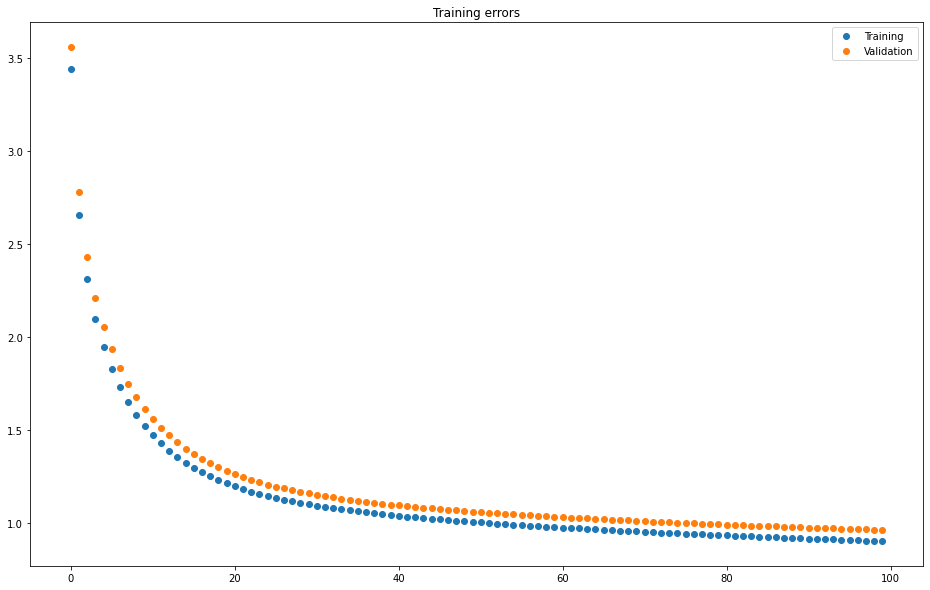

In [23]:
plt.figure(figsize = [16,10])
plt.plot(
    train_errors,
    'o'
)
plt.plot(
    val_errors, 
    'o'
)

plt.legend(["Training", "Validation"])
plt.title("Training errors")

In [24]:
X, Theta = model.X, model.Theta

In [25]:
X.shape

(5, 10109)

In [36]:
ratings_df

,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,3,1.0,29,10,2006,23,17,16
1,75,32,4.5,29,10,2006,23,23,44
2,75,110,4.0,29,10,2006,23,30,8
3,75,160,2.0,29,10,2006,23,16,52
4,75,163,4.0,29,10,2006,23,29,30
...,...,...,...,...,...,...,...,...,...
855593,71534,44555,4.0,3,12,2007,3,5,38
855594,71534,46578,4.0,3,12,2007,2,56,44
855595,71534,48516,4.5,3,12,2007,2,53,46
855596,71534,61075,5.0,10,10,2008,9,56,5


In [26]:
model.rms(
    y_train,
    (Theta.T @ X)
)

0.9048028708224105

In [27]:
Theta.tofile(
    "data/collaborative-filtering/model/Theta_l2.csv",
    sep= ','    
)

In [28]:
X.tofile(
    "data/collaborative-filtering/model/X_l2.csv",
    sep= ','    
)

In [29]:
y_pred = Theta.T @ X

Text(0.5, 6.79999999999999, 'prediction')

<Figure size 1152x720 with 0 Axes>

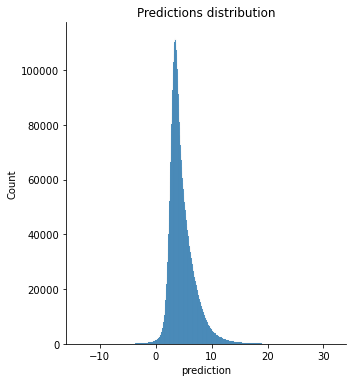

In [30]:
plt.figure(figsize = [16, 10])
sns.displot(y_pred.flatten())
plt.title("Predictions distribution")
plt.xlabel("prediction")

In [31]:
{
    'max value': y_pred.max(),
    'min value': y_pred.min(),
    'average value': y_pred.mean(),
    'median value': np.median(y_pred), 
    'quantile 0.05' : np.quantile(y_pred, 0.05),
    'quantile 0.9': np.quantile(y_pred, 0.9),
}

{'max value': 31.68933880010848,
 'min value': -13.692230420323508,
 'average value': 4.6701485535023375,
 'median value': 4.1114102547054285,
 'quantile 0.05': 2.126053246998667,
 'quantile 0.9': 7.576128377310517}

### Train model with constraints 
As we can see, some predictions are out of the domain of ratings ${0, \ \dots, 5}$
We will them add a constraint to ```y_pred``` and re-train the model 

In [32]:
y_pred[y_pred > 5] = 5
y_pred[y_pred < 0] = 0

In [33]:
model = SGDOptimizer(
    predict_constraints = True
)

In [35]:
model.fit(y_train, y_val)

420068it [00:06, 61602.91it/s]


train epoch 0; 
train error: 1.8917284283135294 
validation error: 1.89272248343296


420068it [00:06, 64513.12it/s]


train epoch 1; 
train error: 1.8768664267235688 
validation error: 1.8857047614462206


420068it [00:07, 57942.12it/s]


train epoch 2; 
train error: 1.8288714128172334 
validation error: 1.842174323360567


420068it [00:08, 52071.90it/s]


train epoch 3; 
train error: 1.7833216275312196 
validation error: 1.7996322287953768


420068it [00:08, 47641.67it/s]


train epoch 4; 
train error: 1.7403529229132235 
validation error: 1.7586971675883352


420068it [00:10, 40548.31it/s]


train epoch 5; 
train error: 1.6970665769000115 
validation error: 1.7168351888977795


420068it [00:07, 59498.33it/s]


train epoch 6; 
train error: 1.6526474875343706 
validation error: 1.6735542929972604


420068it [00:09, 44213.22it/s]


train epoch 7; 
train error: 1.608011274403619 
validation error: 1.6298579759448537


420068it [00:08, 48601.80it/s]


train epoch 8; 
train error: 1.5646446627077926 
validation error: 1.5874610829089955


420068it [00:08, 50250.78it/s]


train epoch 9; 
train error: 1.523412479400959 
validation error: 1.5470486484149022


420068it [00:09, 44837.25it/s]


train epoch 10; 
train error: 1.4846588032969659 
validation error: 1.509092834794134


420068it [00:07, 53052.96it/s]


train epoch 11; 
train error: 1.4486900194791876 
validation error: 1.473748485530724


420068it [00:07, 53020.02it/s]


train epoch 12; 
train error: 1.415575355899195 
validation error: 1.4410356774631614


420068it [00:08, 47796.45it/s]


train epoch 13; 
train error: 1.3850246799225872 
validation error: 1.410770008280273


420068it [00:09, 42194.20it/s]


train epoch 14; 
train error: 1.3568179326500591 
validation error: 1.3828156131078728


420068it [00:09, 42831.66it/s]


train epoch 15; 
train error: 1.330638382928328 
validation error: 1.357094331343317


420068it [00:09, 46272.04it/s]


train epoch 16; 
train error: 1.3062893115854122 
validation error: 1.3334542688301905


420068it [00:08, 48767.75it/s]


train epoch 17; 
train error: 1.2837651708478555 
validation error: 1.3115703101274776


420068it [00:07, 53061.43it/s]


train epoch 18; 
train error: 1.2630703312124025 
validation error: 1.291439295781801


420068it [00:07, 56127.56it/s]


train epoch 19; 
train error: 1.2439888282707428 
validation error: 1.2729041381172954


420068it [00:07, 58800.85it/s]


train epoch 20; 
train error: 1.2263531323160766 
validation error: 1.2557098336183834


420068it [00:07, 58061.16it/s]


train epoch 21; 
train error: 1.2100195441248944 
validation error: 1.2397819789960378


420068it [00:07, 59811.56it/s]


train epoch 22; 
train error: 1.1948913017226264 
validation error: 1.2250635303443336


420068it [00:07, 58616.78it/s]


train epoch 23; 
train error: 1.180842220509794 
validation error: 1.2114155407490272


420068it [00:06, 60247.79it/s]


train epoch 24; 
train error: 1.167705781940173 
validation error: 1.1986118012498341


420068it [00:06, 60294.47it/s]


train epoch 25; 
train error: 1.1553660996810524 
validation error: 1.1865932412256504


420068it [00:07, 54561.22it/s]


train epoch 26; 
train error: 1.1437787788097173 
validation error: 1.1753435983776084


420068it [00:07, 59765.46it/s]


train epoch 27; 
train error: 1.1328345312236177 
validation error: 1.1647363229316672


420068it [00:08, 47624.02it/s]


train epoch 28; 
train error: 1.122477812022293 
validation error: 1.154716053078435


420068it [00:08, 47234.35it/s]


train epoch 29; 
train error: 1.1127707253615016 
validation error: 1.1452806101220065


420068it [00:07, 53924.38it/s]


train epoch 30; 
train error: 1.1036385204826433 
validation error: 1.136394752298305


420068it [00:07, 54987.47it/s]


train epoch 31; 
train error: 1.0950077257204367 
validation error: 1.1280058031401141


420068it [00:07, 54508.25it/s]


train epoch 32; 
train error: 1.08678729610217 
validation error: 1.120036416535724


420068it [00:07, 55270.89it/s]


train epoch 33; 
train error: 1.0789055012996416 
validation error: 1.1123706302937404


420068it [00:07, 57751.81it/s]


train epoch 34; 
train error: 1.0713714644621481 
validation error: 1.105018517867808


420068it [00:07, 52823.08it/s]


train epoch 35; 
train error: 1.0641772953297937 
validation error: 1.0979863419739775


420068it [00:07, 56240.71it/s]


train epoch 36; 
train error: 1.0572754681625225 
validation error: 1.0912671089852046


420068it [00:07, 54153.10it/s]


train epoch 37; 
train error: 1.0506855255628522 
validation error: 1.0848467192372546


420068it [00:07, 56091.80it/s]


train epoch 38; 
train error: 1.0444103330358339 
validation error: 1.0787387409403815


420068it [00:07, 54976.64it/s]


train epoch 39; 
train error: 1.0384107651429815 
validation error: 1.07292410084612


420068it [00:07, 55434.98it/s]


train epoch 40; 
train error: 1.0326679481893724 
validation error: 1.0673574928980802


420068it [00:08, 48998.76it/s]


train epoch 41; 
train error: 1.0271734164059436 
validation error: 1.0620175296475243


420068it [00:08, 52413.73it/s]


train epoch 42; 
train error: 1.0218982514978692 
validation error: 1.056878541519313


420068it [00:07, 54535.25it/s]


train epoch 43; 
train error: 1.0168184962794673 
validation error: 1.0519094176962365


420068it [00:07, 53498.08it/s]


train epoch 44; 
train error: 1.0118962699929324 
validation error: 1.047108346104993


420068it [00:08, 48539.84it/s]


train epoch 45; 
train error: 1.0071395816838953 
validation error: 1.0424581101865553


420068it [00:07, 53012.94it/s]


train epoch 46; 
train error: 1.002544426771985 
validation error: 1.0379693565695232


420068it [00:07, 54307.60it/s]


train epoch 47; 
train error: 0.998094775985991 
validation error: 1.0336290493830045


420068it [00:08, 47141.20it/s]


train epoch 48; 
train error: 0.9937796001503401 
validation error: 1.0294238303847327


420068it [00:08, 51393.83it/s]


train epoch 49; 
train error: 0.9896048773900858 
validation error: 1.0253553425470852


420068it [00:07, 54077.30it/s]


train epoch 50; 
train error: 0.9855554771217033 
validation error: 1.0214198629531963


420068it [00:11, 36492.39it/s]


train epoch 51; 
train error: 0.9816221564271495 
validation error: 1.017621118268069


420068it [00:07, 54662.12it/s]


train epoch 52; 
train error: 0.9777903186691868 
validation error: 1.013945388899446


420068it [00:06, 63438.89it/s]


train epoch 53; 
train error: 0.974061965144737 
validation error: 1.0103743281475046


420068it [00:07, 58551.36it/s]


train epoch 54; 
train error: 0.9704352557702729 
validation error: 1.0069109585378822


420068it [00:06, 60150.55it/s]


train epoch 55; 
train error: 0.9669177300056191 
validation error: 1.0035498653550063


420068it [00:06, 63374.81it/s]


train epoch 56; 
train error: 0.9635023134332859 
validation error: 1.0002865842964428


420068it [00:07, 57559.31it/s]


train epoch 57; 
train error: 0.9601889768203311 
validation error: 0.9971091286548837


420068it [00:06, 65171.27it/s]


train epoch 58; 
train error: 0.9569658764711074 
validation error: 0.9940185573325573


420068it [00:06, 60634.54it/s]


train epoch 59; 
train error: 0.9538328048222758 
validation error: 0.991013263153645


420068it [00:06, 66628.24it/s]


train epoch 60; 
train error: 0.9507936669628686 
validation error: 0.9880866920653855


420068it [00:07, 53894.55it/s]


train epoch 61; 
train error: 0.9478338766690357 
validation error: 0.9852361582905164


420068it [00:06, 66163.54it/s]


train epoch 62; 
train error: 0.9449605310200123 
validation error: 0.982461328366195


420068it [00:06, 63337.99it/s]


train epoch 63; 
train error: 0.9421737078545128 
validation error: 0.9797581813719797


420068it [00:07, 53460.12it/s]


train epoch 64; 
train error: 0.9394730762809256 
validation error: 0.9771307009206761


420068it [00:07, 56807.69it/s]


train epoch 65; 
train error: 0.9368410083490117 
validation error: 0.9745791306309398


420068it [00:08, 49391.07it/s]


train epoch 66; 
train error: 0.9342837128581297 
validation error: 0.9720948544667066


420068it [00:09, 45814.24it/s]


train epoch 67; 
train error: 0.931797966508087 
validation error: 0.9696829341101173


420068it [00:08, 46813.79it/s]


train epoch 68; 
train error: 0.9293817228392223 
validation error: 0.9673317527375143


420068it [00:12, 34272.03it/s]


train epoch 69; 
train error: 0.9270288460150607 
validation error: 0.9650310287978972


420068it [00:07, 55265.85it/s]


train epoch 70; 
train error: 0.9247370432074821 
validation error: 0.9627836532762407


420068it [00:07, 52945.82it/s]


train epoch 71; 
train error: 0.9225028774034301 
validation error: 0.9605824177346107


420068it [00:08, 50978.77it/s]


train epoch 72; 
train error: 0.9203182643661459 
validation error: 0.9584333667011804


420068it [00:07, 54504.21it/s]


train epoch 73; 
train error: 0.9181837779115426 
validation error: 0.9563367304837131


420068it [00:07, 57173.47it/s]


train epoch 74; 
train error: 0.9160972825582299 
validation error: 0.954285684204122


420068it [00:08, 52497.08it/s]


train epoch 75; 
train error: 0.9140560565332921 
validation error: 0.9522830862813194


420068it [00:07, 53937.08it/s]


train epoch 76; 
train error: 0.9120592946523054 
validation error: 0.950329182174311


420068it [00:08, 52328.01it/s]


train epoch 77; 
train error: 0.9101052979045504 
validation error: 0.9484177815978503


420068it [00:07, 53860.09it/s]


train epoch 78; 
train error: 0.9081941144037234 
validation error: 0.9465449567099655


420068it [00:07, 58186.96it/s]


train epoch 79; 
train error: 0.9063223610386746 
validation error: 0.944716770855262


420068it [00:08, 49185.82it/s]


train epoch 80; 
train error: 0.904489823285758 
validation error: 0.9429270239406492


420068it [00:07, 53231.85it/s]


train epoch 81; 
train error: 0.9026941314522553 
validation error: 0.9411775407215058


420068it [00:07, 54219.72it/s]


train epoch 82; 
train error: 0.9009320601221373 
validation error: 0.9394692592080889


420068it [00:08, 49733.64it/s]


train epoch 83; 
train error: 0.8992008451796862 
validation error: 0.93779553599817


420068it [00:08, 46805.80it/s]


train epoch 84; 
train error: 0.8975018936045974 
validation error: 0.9361575811985172


420068it [00:08, 48601.78it/s]


train epoch 85; 
train error: 0.8958380436099098 
validation error: 0.9345450041810588


420068it [00:08, 48760.69it/s]


train epoch 86; 
train error: 0.894206830268218 
validation error: 0.932962142922435


420068it [00:09, 42840.04it/s]


train epoch 87; 
train error: 0.8926085177308382 
validation error: 0.9314115999672552


420068it [00:09, 44319.34it/s]


train epoch 88; 
train error: 0.891043185150691 
validation error: 0.929892933510435


420068it [00:08, 48806.56it/s]


train epoch 89; 
train error: 0.8895078339709646 
validation error: 0.928405766899387


420068it [00:09, 44096.25it/s]


train epoch 90; 
train error: 0.8880036852240799 
validation error: 0.926946090205433


420068it [00:08, 47334.98it/s]


train epoch 91; 
train error: 0.886531794581878 
validation error: 0.9255105761690805


420068it [00:08, 50919.53it/s]


train epoch 92; 
train error: 0.8850892767412671 
validation error: 0.9241059107411779


420068it [00:08, 49414.12it/s]


train epoch 93; 
train error: 0.8836767977237974 
validation error: 0.9227257646133205


420068it [00:07, 54109.34it/s]


train epoch 94; 
train error: 0.8822908384955809 
validation error: 0.92137121964775


420068it [00:08, 51111.72it/s]


train epoch 95; 
train error: 0.8809306711826096 
validation error: 0.92004247369235


420068it [00:08, 52164.69it/s]


train epoch 96; 
train error: 0.8795956696765151 
validation error: 0.9187401679810334


420068it [00:09, 45003.45it/s]


train epoch 97; 
train error: 0.878279763886173 
validation error: 0.9174650868589127


420068it [00:08, 48989.88it/s]


train epoch 98; 
train error: 0.8769884156796498 
validation error: 0.9162167133668027


420068it [00:08, 50729.66it/s]


train epoch 99; 
train error: 0.8757206621449103 
validation error: 0.9149935648939787


In [36]:
train_constraints_errors, \
    val_constraints_errors = model.get_evaluation_errors()

Text(0.5, 1.0, 'Training errors')

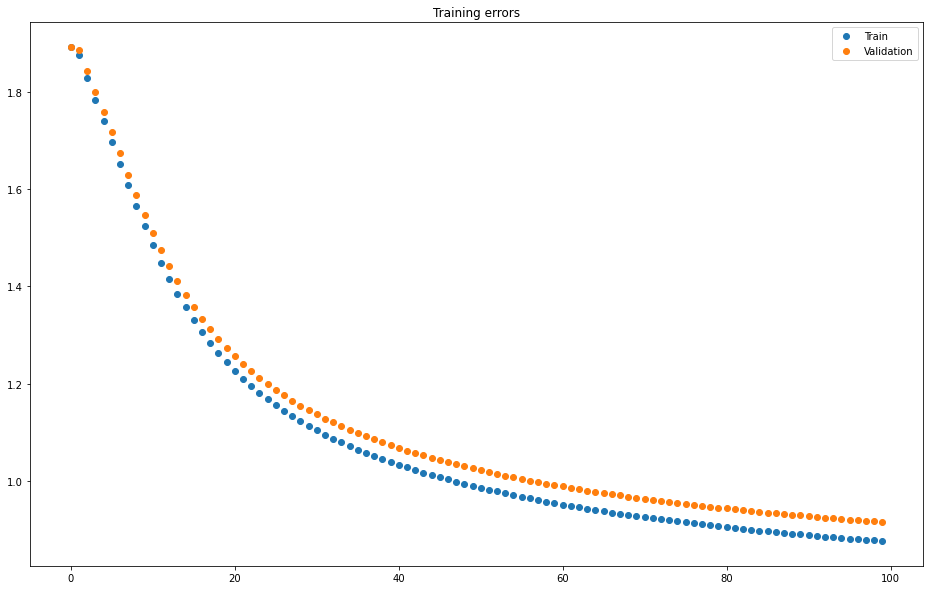

In [38]:
plt.figure(figsize = [16,10])
plt.plot(
    train_constraints_errors,
    'o'
)
plt.plot(
    val_constraints_errors,
    'o'
)
plt.legend(["Train", "Validation"])
plt.title("Training errors")

In [39]:
y_pred_constraint = model.predict()

In [40]:
{
    'max value': y_pred_constraint.max(),
    'min value': y_pred_constraint.min(),
    'average value': y_pred_constraint.mean(),
    'median value': np.median(y_pred_constraint), 
    'quantile 0.05' : np.quantile(y_pred_constraint, 0.05),
    'quantile 0.65': np.quantile(y_pred_constraint, 0.65),
}

{'max value': 5.0,
 'min value': 0.0,
 'average value': 4.026251922035183,
 'median value': 4.254562271402981,
 'quantile 0.05': 2.1673022612938126,
 'quantile 0.65': 5.0}

In [41]:
(y_pred_constraint == 5).sum() / (y_pred.shape[0] * y_pred.shape[1])

0.3797966575121521

In [54]:
Theta.shape

(5, 2113)

In [55]:
X.shape

(5, 10109)

In [57]:
model.X

array([[1.24923894, 1.12970877, 1.21315456, ..., 1.8074294 , 3.41212778,
        2.86239464],
       [1.67671302, 1.26808274, 1.2040384 , ..., 1.35538666, 0.40702561,
        4.652524  ],
       [0.14451788, 0.26356898, 0.46007917, ..., 0.32758148, 2.13492821,
        2.90840964],
       [1.58347339, 1.28132935, 1.23199482, ..., 3.88777802, 2.36396463,
        4.83031773],
       [0.30269049, 0.22962143, 0.26632455, ..., 4.56429651, 3.14049238,
        0.22094613]])

In [58]:
model.Theta

array([[ 0.2481517 ,  0.69565532,  0.36150061, ...,  0.86570183,
         0.3846949 ,  1.59075602],
       [ 1.98875554,  0.87053267,  0.43516226, ...,  0.94512114,
         0.72597324,  0.64512891],
       [-0.66071818,  0.18041338,  0.6715261 , ..., -0.07737793,
         0.03356071,  0.83982544],
       [ 0.39120768,  0.91449841,  0.95245048, ...,  0.88657342,
         1.02779107,  0.12804095],
       [-0.31456773, -0.04147991,  0.12534207, ...,  0.01744484,
         0.19229549,  0.25696118]])

In [52]:
model.Theta.tofile(
    "data/collaborative-filtering/model/Theta_w_constraints.pkl",
    sep= ','    
)

model.X.tofile(
    "data/collaborative-filtering/model/X_w_constraints.pkl",
    sep= ','    
)

Text(0.5, 6.79999999999999, 'prediction')

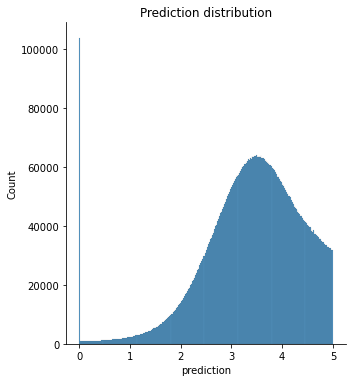

In [43]:

sns.displot(y_pred[y_pred < 5])
plt.title("Prediction distribution")
plt.xlabel("prediction")

### Regularization 
From now, we have trained models using $l_2$ regularization. 

Now we will try a $l_1$ regularization model:

$$
    J(\Theta, X) = \sum (y - \theta ^{(i)T}  x^{(j)}) ^2 + \lambda (|| \theta^{(i)} ||+ || x^{(j)} || )
$$

In [44]:
l1_model = SGDOptimizer(
    regularization = 'l1'
)

In [45]:
l1_model.fit(y_train, y_val)

420068it [00:06, 63339.48it/s]


train epoch 0; 
train error: 3.456435511440434 
validation error: 3.561834455159403


420068it [00:06, 63025.21it/s]


train epoch 1; 
train error: 2.682510320399058 
validation error: 2.799352650302847


420068it [00:06, 64824.12it/s]


train epoch 2; 
train error: 2.3434522286872745 
validation error: 2.4637247765825405


420068it [00:07, 53787.19it/s]


train epoch 3; 
train error: 2.134082161377939 
validation error: 2.2543226078782674


420068it [00:08, 52123.20it/s]


train epoch 4; 
train error: 1.9828790511689336 
validation error: 2.101034767769359


420068it [00:08, 51124.11it/s]


train epoch 5; 
train error: 1.8640033228736193 
validation error: 1.9788993123934115


420068it [00:09, 45235.07it/s]


train epoch 6; 
train error: 1.7660612250782888 
validation error: 1.877093839151442


420068it [00:08, 48437.91it/s]


train epoch 7; 
train error: 1.6830313284565048 
validation error: 1.789904983334249


420068it [00:08, 48370.87it/s]


train epoch 8; 
train error: 1.6113835126074614 
validation error: 1.7140751869475985


420068it [00:10, 39507.38it/s]


train epoch 9; 
train error: 1.5487659565517262 
validation error: 1.6474223970030186


420068it [00:08, 47135.50it/s]


train epoch 10; 
train error: 1.4935516267673115 
validation error: 1.5884085861727646


420068it [00:07, 55100.77it/s]


train epoch 11; 
train error: 1.4445973762127433 
validation error: 1.5359634874257184


420068it [00:07, 56069.20it/s]


train epoch 12; 
train error: 1.4010097730551268 
validation error: 1.4892135068310761


420068it [00:10, 40724.78it/s]


train epoch 13; 
train error: 1.3620691200102601 
validation error: 1.4474294935153738


420068it [00:07, 52570.20it/s]


train epoch 14; 
train error: 1.3271812158250615 
validation error: 1.409984937762692


420068it [00:07, 55065.14it/s]


train epoch 15; 
train error: 1.295834893331966 
validation error: 1.3763604736637205


420068it [00:08, 49100.31it/s]


train epoch 16; 
train error: 1.2675989749581507 
validation error: 1.3461029411063554


420068it [00:07, 56240.96it/s]


train epoch 17; 
train error: 1.2420983232069274 
validation error: 1.3188000416346295


420068it [00:07, 56249.40it/s]


train epoch 18; 
train error: 1.2190100241600073 
validation error: 1.2941124545509948


420068it [00:07, 56240.30it/s]


train epoch 19; 
train error: 1.1980477370188103 
validation error: 1.2717250570958893


420068it [00:07, 57660.27it/s]


train epoch 20; 
train error: 1.1789618003061788 
validation error: 1.2513777295369686


420068it [00:07, 57250.25it/s]


train epoch 21; 
train error: 1.1615248721829443 
validation error: 1.2328181144716255


420068it [00:07, 57395.83it/s]


train epoch 22; 
train error: 1.1455477247907089 
validation error: 1.2158466177354297


420068it [00:07, 57170.79it/s]


train epoch 23; 
train error: 1.1308613652835005 
validation error: 1.2002822755679667


420068it [00:07, 56841.61it/s]


train epoch 24; 
train error: 1.117316269969466 
validation error: 1.1859617617404412


420068it [00:07, 57640.08it/s]


train epoch 25; 
train error: 1.1047871021631297 
validation error: 1.1727485105523032


420068it [00:07, 57208.97it/s]


train epoch 26; 
train error: 1.0931642742423446 
validation error: 1.1605281114174162


420068it [00:07, 56737.00it/s]


train epoch 27; 
train error: 1.0823530667869237 
validation error: 1.1491982551547035


420068it [00:08, 49940.40it/s]


train epoch 28; 
train error: 1.072267028547713 
validation error: 1.1386611349787004


420068it [00:07, 55329.54it/s]


train epoch 29; 
train error: 1.0628337912287478 
validation error: 1.1288367199389984


420068it [00:10, 38986.43it/s]


train epoch 30; 
train error: 1.053988635900105 
validation error: 1.1196531361304047


420068it [00:08, 47904.68it/s]


train epoch 31; 
train error: 1.0456726852409608 
validation error: 1.111049447310566


420068it [00:07, 54034.14it/s]


train epoch 32; 
train error: 1.0378317903172556 
validation error: 1.102963885909658


420068it [00:07, 53153.98it/s]


train epoch 33; 
train error: 1.0304356982897325 
validation error: 1.0953604819715355


420068it [00:07, 53776.83it/s]


train epoch 34; 
train error: 1.0234517644841268 
validation error: 1.0882045131362694


420068it [00:07, 56888.93it/s]


train epoch 35; 
train error: 1.016830547571061 
validation error: 1.0814405109365655


420068it [00:07, 57042.75it/s]


train epoch 36; 
train error: 1.0105488279538726 
validation error: 1.075043137507581


420068it [00:07, 56380.76it/s]


train epoch 37; 
train error: 1.004580397849203 
validation error: 1.0689808030416728


420068it [00:07, 57410.94it/s]


train epoch 38; 
train error: 0.9989023443028542 
validation error: 1.06323239382098


420068it [00:07, 57051.40it/s]


train epoch 39; 
train error: 0.9934944872613182 
validation error: 1.0577752113985686


420068it [00:07, 57390.21it/s]


train epoch 40; 
train error: 0.9883299920220981 
validation error: 1.0525817363601009


420068it [00:07, 57053.31it/s]


train epoch 41; 
train error: 0.983396909764175 
validation error: 1.0476341876472144


420068it [00:07, 53225.20it/s]


train epoch 42; 
train error: 0.9786727607858764 
validation error: 1.0429041830052068


420068it [00:07, 56759.30it/s]


train epoch 43; 
train error: 0.9741595322533158 
validation error: 1.0383942977806897


420068it [00:07, 56624.14it/s]


train epoch 44; 
train error: 0.969834326608847 
validation error: 1.0340805341695367


420068it [00:07, 56544.07it/s]


train epoch 45; 
train error: 0.9656835974903993 
validation error: 1.0299436075506254


420068it [00:07, 56627.35it/s]


train epoch 46; 
train error: 0.9616983784155098 
validation error: 1.0259746749173384


420068it [00:07, 57389.76it/s]


train epoch 47; 
train error: 0.9578611306967011 
validation error: 1.022152273758638


420068it [00:07, 57065.32it/s]


train epoch 48; 
train error: 0.9541693599356773 
validation error: 1.0184775636040408


420068it [00:07, 57119.20it/s]


train epoch 49; 
train error: 0.9506034626538978 
validation error: 1.0149251134425656


420068it [00:08, 51611.38it/s]


train epoch 50; 
train error: 0.9471707938634661 
validation error: 1.0115073939529182


420068it [00:08, 51121.19it/s]


train epoch 51; 
train error: 0.9438607303082576 
validation error: 1.0082149773248725


420068it [00:07, 56666.21it/s]


train epoch 52; 
train error: 0.9406626000937421 
validation error: 1.0050360041864572


420068it [00:07, 57076.03it/s]


train epoch 53; 
train error: 0.9375723142616516 
validation error: 1.0019672064538079


420068it [00:07, 57075.59it/s]


train epoch 54; 
train error: 0.9345849398357541 
validation error: 0.9989849682678175


420068it [00:07, 56661.56it/s]


train epoch 55; 
train error: 0.9316994465412594 
validation error: 0.9960959277181582


420068it [00:07, 55670.38it/s]


train epoch 56; 
train error: 0.9289031258756681 
validation error: 0.9932845668446101


420068it [00:09, 45884.85it/s]


train epoch 57; 
train error: 0.9261989553215901 
validation error: 0.9905519258471376


420068it [00:09, 43438.85it/s]


train epoch 58; 
train error: 0.9235840929855919 
validation error: 0.9879045944797471


420068it [00:09, 44934.88it/s]


train epoch 59; 
train error: 0.9210437143957874 
validation error: 0.985323950587813


420068it [00:09, 46258.73it/s]


train epoch 60; 
train error: 0.9185879201433492 
validation error: 0.9828222640377126


420068it [00:08, 49486.06it/s]


train epoch 61; 
train error: 0.9162088229850958 
validation error: 0.9803908135824574


420068it [00:08, 52145.47it/s]


train epoch 62; 
train error: 0.9139002685108985 
validation error: 0.9780210483562664


420068it [00:09, 46462.79it/s]


train epoch 63; 
train error: 0.9116574603662861 
validation error: 0.9757110621779024


420068it [00:08, 46836.66it/s]


train epoch 64; 
train error: 0.9094742379470121 
validation error: 0.9734572739700725


420068it [00:11, 35627.91it/s]


train epoch 65; 
train error: 0.9073466318054577 
validation error: 0.9712537218472892


420068it [00:10, 39419.66it/s]


train epoch 66; 
train error: 0.9052745928933301 
validation error: 0.9690925057229287


420068it [00:07, 53605.49it/s]


train epoch 67; 
train error: 0.9032599132039857 
validation error: 0.9669802519509365


420068it [00:07, 55460.15it/s]


train epoch 68; 
train error: 0.9012998561338526 
validation error: 0.9649101067773836


420068it [00:07, 56883.01it/s]


train epoch 69; 
train error: 0.8993912902530313 
validation error: 0.962892975370504


420068it [00:08, 48794.60it/s]


train epoch 70; 
train error: 0.8975331724348489 
validation error: 0.9609229956345086


420068it [00:08, 51698.77it/s]


train epoch 71; 
train error: 0.8957320356693944 
validation error: 0.9590062322960222


420068it [00:10, 40557.30it/s]


train epoch 72; 
train error: 0.8939809533905547 
validation error: 0.9571374586788318


420068it [00:08, 49948.12it/s]


train epoch 73; 
train error: 0.8922814488485655 
validation error: 0.9553202239998403


420068it [00:08, 49138.55it/s]


train epoch 74; 
train error: 0.8906326100443799 
validation error: 0.9535545924541061


420068it [00:08, 47941.73it/s]


train epoch 75; 
train error: 0.8890288100886635 
validation error: 0.9518399925612909


420068it [00:09, 45127.42it/s]


train epoch 76; 
train error: 0.8874723236660899 
validation error: 0.9501716688104754


420068it [00:07, 52955.53it/s]


train epoch 77; 
train error: 0.8859614029437151 
validation error: 0.9485498278537846


420068it [00:08, 48808.79it/s]


train epoch 78; 
train error: 0.8844889587575023 
validation error: 0.946967515203499


420068it [00:08, 48801.09it/s]


train epoch 79; 
train error: 0.8830568516665492 
validation error: 0.945432543571661


420068it [00:08, 49598.46it/s]


train epoch 80; 
train error: 0.8816628636797308 
validation error: 0.9439392880329585


420068it [00:08, 48802.44it/s]


train epoch 81; 
train error: 0.8803020334784887 
validation error: 0.9424833452157962


420068it [00:08, 50239.25it/s]


train epoch 82; 
train error: 0.8789744289418182 
validation error: 0.9410649913808764


420068it [00:07, 54613.01it/s]


train epoch 83; 
train error: 0.8776790050061031 
validation error: 0.9396827483437871


420068it [00:07, 57432.73it/s]


train epoch 84; 
train error: 0.8764169148870993 
validation error: 0.938330139107351


420068it [00:07, 53463.32it/s]


train epoch 85; 
train error: 0.875185671640807 
validation error: 0.9370096662408686


420068it [00:07, 55050.80it/s]


train epoch 86; 
train error: 0.8739820013243521 
validation error: 0.9357173873180981


420068it [00:08, 48961.03it/s]


train epoch 87; 
train error: 0.8728069761357672 
validation error: 0.9344535062170792


420068it [00:07, 52949.54it/s]


train epoch 88; 
train error: 0.8716585642682789 
validation error: 0.9332169706947202


420068it [00:06, 60566.94it/s]


train epoch 89; 
train error: 0.8705356357863524 
validation error: 0.932003823294182


420068it [00:07, 57557.40it/s]


train epoch 90; 
train error: 0.8694334005623201 
validation error: 0.9308080482828168


420068it [00:07, 58310.33it/s]


train epoch 91; 
train error: 0.8683591359895876 
validation error: 0.92963645809145


420068it [00:07, 54483.70it/s]


train epoch 92; 
train error: 0.8673045722821677 
validation error: 0.9284833941502888


420068it [00:07, 56042.00it/s]


train epoch 93; 
train error: 0.8662703076489958 
validation error: 0.9273452849705701


420068it [00:07, 56194.27it/s]


train epoch 94; 
train error: 0.8652560736115184 
validation error: 0.9262231609097088


420068it [00:07, 57363.24it/s]


train epoch 95; 
train error: 0.8642538141671839 
validation error: 0.9251056921876226


420068it [00:07, 56633.36it/s]


train epoch 96; 
train error: 0.8632782581208567 
validation error: 0.9240136228335424


420068it [00:07, 55660.26it/s]


train epoch 97; 
train error: 0.8623207118287661 
validation error: 0.9229394007020532


420068it [00:07, 57095.48it/s]


train epoch 98; 
train error: 0.8613795576818226 
validation error: 0.9218784065864652


420068it [00:07, 56429.14it/s]


train epoch 99; 
train error: 0.86045175644718 
validation error: 0.9208245417586273


In [46]:
train_l1_err, train_l1_val = model.get_evaluation_errors()

Text(0.5, 1.0, 'Training errors')

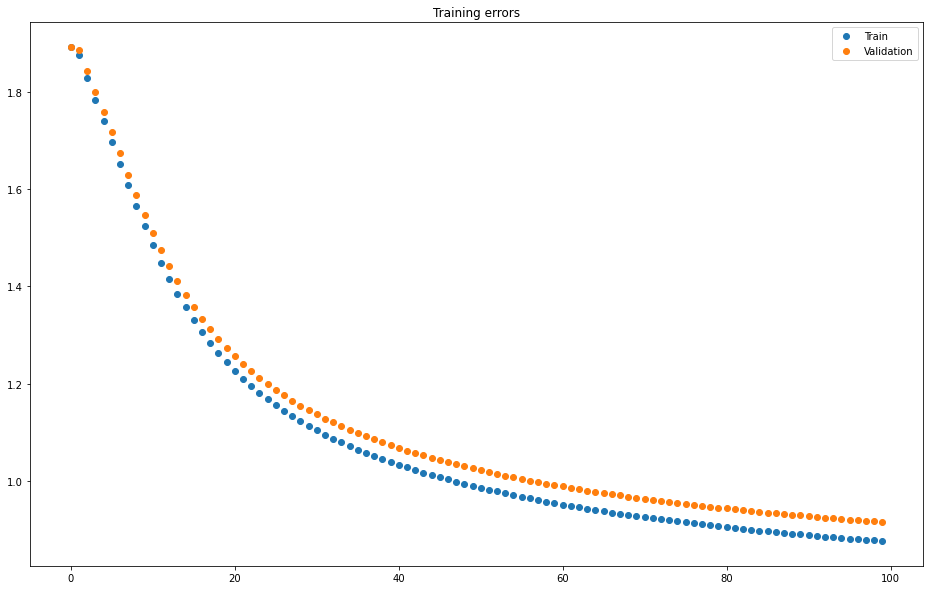

In [47]:
plt.figure(figsize = [16,10])
plt.plot(
    train_l1_err,
    'o'
)
plt.plot(
    train_l1_val,
    'o'
)
plt.legend(["Train", "Validation"])
plt.title("Training errors")

In [49]:
l1_model

SGDOptimizer(regularization='l1')

In [50]:
l1_model.Theta.tofile(
    "data/collaborative-filtering/model/Theta_l1.pkl",
    sep= ','    
)

l1_model.X.tofile(
    "data/collaborative-filtering/model/X_l1.pkl",
    sep= ','    
)

## Conclusions
The best (and selected) model in validation was the one with constraints and $l_2$ regularization